<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#ElasticNet-on-Barclays" data-toc-modified-id="ElasticNet-on-Barclays-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>ElasticNet on Barclays</a></span></li></ul></div>

# ElasticNet on Barclays

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import ElasticNet

from IPython.display import display, HTML
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np
import random as rd
import warnings
import pandas as pd

display(HTML("<style>.container { width:80% !important; }</style>"))
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)

In [2]:
FTSE_volatility_df = pd.read_csv('../data/1.3-FTSE_ESG_Volatility_Final.csv')
asset = 8589934333

sample_df = FTSE_volatility_df[FTSE_volatility_df.Asset == asset]
sample_df = sample_df[sample_df['V^YZ'].notnull()].reset_index(drop=True)
display(sample_df)

,Date,Asset,Open,High,Low,Close,Return,V^CC,V^RS,V^YZ,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce
0,2006-01-10,8589934333,5.631573,5.631573,5.555106,5.568600,-0.014331,0.012363,0.010122,0.010916,5717.0,81.0,59.0,37.0,64.0,88.0,91.0,54.0,93.0,59.0,77.0,81.0,92.0,81.0,19.0,95.0,100.0
1,2006-01-11,8589934333,5.618079,5.654063,5.577596,5.636071,0.012116,0.011434,0.009964,0.010721,5710.5,81.0,59.0,37.0,64.0,87.0,91.0,54.0,93.0,59.0,77.0,81.0,92.0,81.0,18.0,95.0,100.0
2,2006-01-12,8589934333,5.636071,5.694546,5.618079,5.654063,0.003192,0.010369,0.010724,0.011302,5704.5,81.0,59.0,37.0,64.0,88.0,91.0,52.0,93.0,60.0,77.0,81.0,92.0,81.0,18.0,95.0,100.0
3,2006-01-13,8589934333,5.645067,5.663059,5.568600,5.586592,-0.011933,0.011009,0.011386,0.011978,5704.5,81.0,59.0,37.0,64.0,88.0,91.0,52.0,93.0,59.0,77.0,80.0,93.0,81.0,18.0,95.0,100.0
4,2006-01-16,8589934333,5.586592,5.591090,5.532616,5.582094,-0.000805,0.010929,0.008922,0.009904,5711.0,81.0,59.0,37.0,63.0,88.0,91.0,51.0,93.0,59.0,76.0,80.0,92.0,81.0,18.0,95.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4285,2022-12-22,8589934333,1.580800,1.590014,1.571400,1.571400,-0.005947,0.008642,0.012376,0.013064,50598.5,71.0,42.0,13.0,88.0,78.0,46.0,83.0,7.0,85.0,90.0,64.0,79.0,2.0,80.0,74.0,81.0
4286,2022-12-23,8589934333,1.571400,1.583600,1.566400,1.577400,0.003819,0.007548,0.010201,0.011058,50578.0,70.0,42.0,13.0,88.0,78.0,45.0,83.0,7.0,85.0,90.0,62.0,78.0,2.0,80.0,74.0,81.0
4287,2022-12-28,8589934333,1.582400,1.596600,1.574400,1.588800,0.007227,0.007625,0.010073,0.010988,50718.5,70.0,42.0,13.0,88.0,78.0,45.0,83.0,7.0,86.0,90.0,60.0,78.0,2.0,79.0,75.0,81.0
4288,2022-12-29,8589934333,1.581400,1.593400,1.570400,1.593400,0.002895,0.007588,0.009911,0.010119,50737.5,70.0,42.0,13.0,88.0,78.0,45.0,83.0,7.0,86.0,90.0,58.0,78.0,2.0,79.0,75.0,81.0


In [4]:
sample_df[sample_df['CSRStrategy'].isnull()]

,Date,Asset,Open,High,Low,Close,Return,V^CC,V^RS,V^YZ,buzz,ESG,ESGCombined,ESGControversies,EnvironmentalPillar,GovernancePillar,SocialPillar,CSRStrategy,Community,Emissions,EnvironmentalInnovation,HumanRights,Management,ProductResponsibility,ResourceUse,Shareholders,Workforce
166,2006-09-06,8589934333,6.027403,6.036399,5.946437,5.982422,-0.011887,0.013842,0.010985,0.011721,6247.0,81.0,60.0,39.0,66.0,92.0,88.0,NaN,91.0,48.0,84.0,83.0,92.0,85.0,11.0,93.0,89.0
167,2006-09-07,8589934333,5.964430,5.964430,5.883465,5.905955,-0.012782,0.014995,0.010551,0.011387,6238.0,82.0,60.0,39.0,67.0,92.0,87.0,NaN,92.0,48.0,85.0,82.0,92.0,87.0,11.0,93.0,88.0
168,2006-09-08,8589934333,5.919449,5.964430,5.883465,5.923947,0.003046,0.007360,0.009446,0.009453,6225.0,82.0,61.0,40.0,67.0,92.0,88.0,NaN,91.0,48.0,85.0,83.0,92.0,87.0,11.0,93.0,88.0
169,2006-09-11,8589934333,5.905955,5.977924,5.883465,5.973426,0.008352,0.009393,0.008343,0.008819,6241.0,83.0,61.0,40.0,68.0,93.0,88.0,NaN,91.0,49.0,85.0,83.0,93.0,87.0,20.0,93.0,89.0
170,2006-09-12,8589934333,5.991418,6.076881,5.941939,6.058889,0.014307,0.012126,0.010111,0.010666,6284.0,82.0,60.0,37.0,68.0,93.0,88.0,NaN,90.0,50.0,85.0,83.0,92.0,87.0,20.0,94.0,88.0
171,2006-09-13,8589934333,6.090375,6.094874,6.040897,6.085877,0.004454,0.010082,0.009775,0.010372,6322.0,83.0,60.0,38.0,68.0,93.0,88.0,NaN,90.0,49.0,85.0,84.0,93.0,87.0,20.0,94.0,90.0
172,2006-09-14,8589934333,6.072385,6.144352,6.040897,6.085877,0.000000,0.005515,0.010741,0.010869,6327.0,83.0,61.0,39.0,68.0,93.0,89.0,NaN,90.0,49.0,86.0,84.0,93.0,87.0,20.0,94.0,91.0
173,2006-09-15,8589934333,6.094874,6.153348,6.045395,6.117364,0.005174,0.005305,0.011278,0.011298,6318.0,83.0,61.0,38.0,68.0,93.0,89.0,NaN,90.0,49.0,86.0,84.0,93.0,87.0,20.0,94.0,91.0
174,2006-09-18,8589934333,6.112866,6.117364,6.009410,6.036399,-0.013235,0.010045,0.011447,0.011531,6314.0,83.0,61.0,39.0,68.0,93.0,88.0,NaN,91.0,48.0,86.0,83.0,93.0,86.0,20.0,94.0,91.0
175,2006-09-19,8589934333,6.036399,6.045395,5.923947,5.932943,-0.017139,0.010361,0.010081,0.010392,6294.0,83.0,61.0,39.0,68.0,93.0,88.0,NaN,91.0,48.0,86.0,83.0,93.0,86.0,19.0,94.0,90.0


In [7]:
sample_df.loc[:, 'CSRStrategy'] = sample_df['CSRStrategy'].fillna(sample_df['CSRStrategy'].rolling(15, min_periods=1).mean())

In [9]:
init_remove = ['Date', 'Asset', 'Return', 'V^CC', 'V^RS']
sample_df = sample_df.drop(init_remove, axis=1)

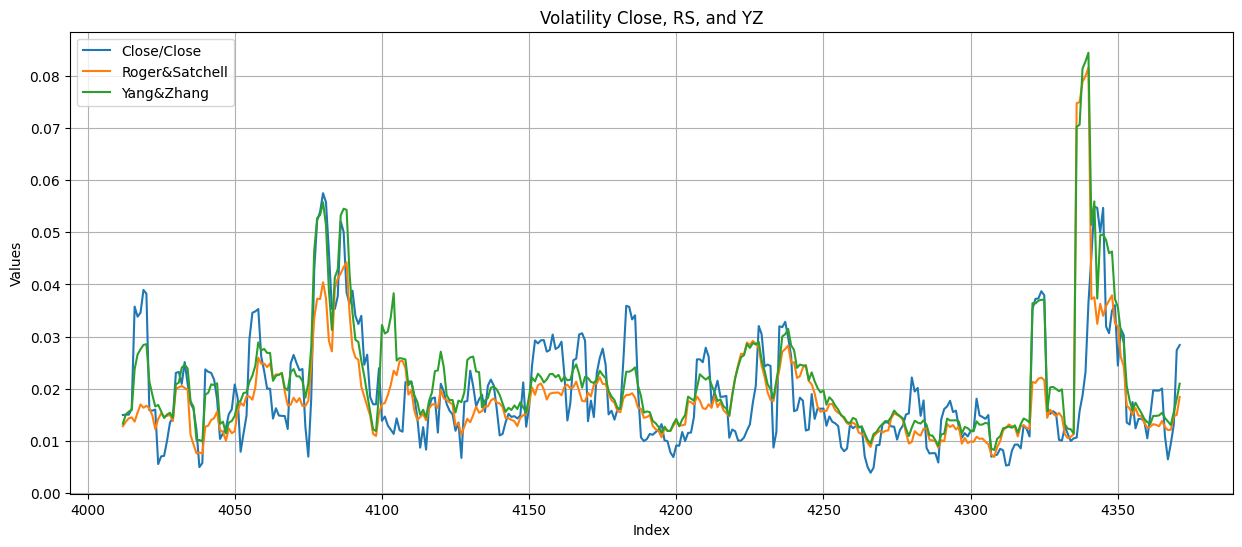

In [4]:
sample_5m = sample_df.iloc[-30*12:, :]

plt.figure(figsize=(15, 6))

# Plot each column
plt.plot(sample_5m['V^CC'], label='Close/Close')
plt.plot(sample_5m['V^RS'], label='Roger&Satchell')
plt.plot(sample_5m['V^YZ'], label='Yang&Zhang')

# Optionally, add grid
plt.grid(True)

# Add legend to distinguish each line
plt.legend()

# Add title and labels
plt.title('Volatility Close, RS, and YZ')
plt.xlabel('Index')
plt.ylabel('Values')

# Display the plot
plt.show()

---

In [10]:
test_size = int(sample_df.shape[0]*0.2)

In [11]:
df_train, df_test = sample_df.iloc[:-test_size,], sample_df.iloc[-test_size:,]

In [12]:
y_train = df_train['V^YZ']

# Define the independent variables
X_train = df_train.drop(['V^YZ'], axis=1)

# Add a constant to the independent variables matrix

In [13]:
# Train the model
model = ElasticNet(l1_ratio=0.5)  # set l1_ratio to something between 0 and 1. 0.5 gives equal weight to L1 and L2 penalties
model.fit(X_train, y_train)

ElasticNet()

In [14]:
y_test = df_test['V^YZ']

# Define the independent variables
X_test = df_test.drop(['V^YZ'], axis=1)

# Add a constant to the independent variables matrix

In [15]:
y_pred = model.predict(X_test)

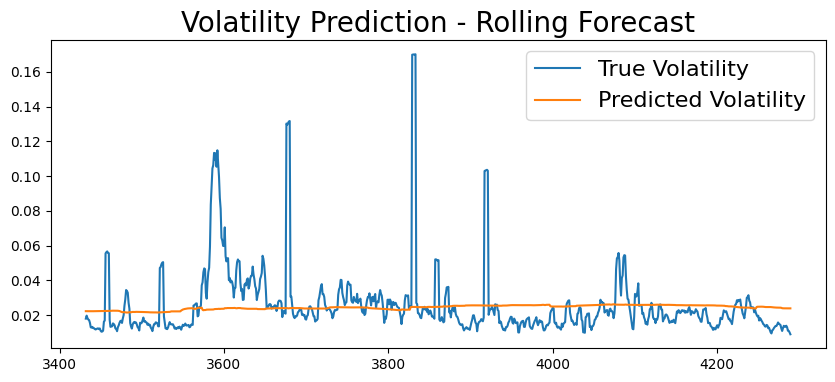

In [16]:
plt.figure(figsize=(10,4))
true, = plt.plot(y_test)
preds, = plt.plot(pd.Series(y_pred, index=y_test.index))
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Volatility', 'Predicted Volatility'], fontsize=16)

In [17]:
mse_million = mean_squared_error(y_test,y_pred)*10**6

In [18]:
GARCH_results = pd.DataFrame({
    'Model':'Heterogeneous AutoRegressive',
    'Test Size': test_size,
    'MSE^6':mse_million
             }
    , index=[0]
)
display(GARCH_results)

,Model,Test Size,MSE^6
0,Heterogeneous AutoRegressive,858,427.780119
